# TP2 - Digit Recognition - SD-TSIA211 - Telecom Paris

Student: DE MENEZES LIMA Marina

Jan 28 2022


---

## Data:

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

As we know, ```keras``` has MNIST as one of its standard datasets. Therefore, we can instantly get both the train and the test data using ```tensorflow.keras.datasets.mnist.load_data``` as follows:

In [16]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

Moreover, we can reorganise it as ```x_train```, ```y_train```, ```x_test```, and ```y_test```. 

In [17]:
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]

x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]

For instance, we can see on of the input images and it expected label:

Expected label: 5


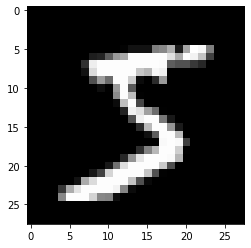

In [18]:
print(f'Expected label: {y_train[0]}')
plt.imshow(train_data[0][0], cmap='gray')

## Neural network model:

In [19]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)


model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


**Question 4.1**

How many optimization variables are we going to train using this model ?

Let the model be defined as follows:

$$ f_1 = \{X^Tw_1 + b \,\,|\,\, w_1 \in \mathbb{R}^{784\times1}; b \in \mathbb{R}^{784}\}$$
$$ f_2 = \mathbb{R}^{32 \times 1} + b$$
$$ f_1 = \mathbb{R}^{1 \times 32} + b$$
$$ f_1 = \mathbb{R}^{10 \times 1} + b$$

Using this model we are going to optimize 26506 variables.

## Stochastic gradient descent

In [20]:
## Updating weights
def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] - update[i]
    model.set_weights(new_weights)

In [21]:
learning_rate = 0.1
learning_rate_k = learning_rate
epochs = 1
loss_plot = []

for i in range(epochs):
  for batch_index in range(x_train.shape[0]):
    x_train_batch = x_train[batch_index].reshape(-1,1).T
    y_train_batch = y_train[batch_index].reshape(-1,1).T
    with tf.GradientTape() as tape:
            logits = model(x_train_batch)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss(y_train_batch, logits)
            loss_plot.append(loss_value)
            
    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss.
    grad = tape.gradient(loss_value, model.trainable_weights)

    update = [item*learning_rate_k for item in grad]
    update_weights(model,update)
    learning_rate_k = learning_rate/np.sqrt(batch_index+1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


We have that the loss function for y_test is:

In [22]:
## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_test[samples_for_evaluation], logits).numpy()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8.337288

For y_train, it is:

In [24]:
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_test[samples_for_evaluation])
loss(y_test[samples_for_evaluation], logits).numpy()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


0.24369492

The plot for the objective value as a function of the iterations:

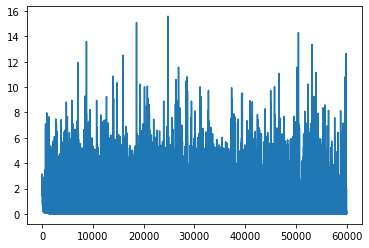

In [29]:
plt.plot(loss_plot)

## Empirical Risk Minimization:


In [30]:
learning_rate = 0.1
learning_rate_k = learning_rate
epochs = 10
loss_plot = []
batch_size = 100 

for i in range(epochs):
  for batch_index in range(0,x_train.shape[0],batch_size):
    x_train_batch = (x_train[batch_index:batch_index+batch_size].sum(axis=0)/batch_size).reshape(-1,1).T 
    y_train_batch = (y_train[batch_index:batch_index+batch_size].sum(axis=0)/batch_size).reshape(-1,1).T
    with tf.GradientTape() as tape:
            logits = model(x_train_batch)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss(y_train_batch, logits)
            loss_plot.append(loss_value)
    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss.
    grad = tape.gradient(loss_value, model.trainable_weights)
    update = [item*learning_rate_k for item in grad]
    update_weights(model,update)
    learning_rate_k = learning_rate/np.sqrt(batch_index+1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [31]:
model.compile(loss=loss,metrics=['accuracy'])

In [32]:
model.evaluate(x_test,y_test)

  1/313 [..............................] - ETA: 1:25 - loss: 3.7372 - accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 1ms/step - loss: 5.3687 - accuracy: 0.1779


[5.368722438812256, 0.17790000140666962]